In [1]:
import pandas as pd
from sklearn import model_selection
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../data/sample_data.csv')
data.keys()

Index([u'[c]Ring No.', u'Unnamed: 1', u'[9] Total Thrust Force',
       u'Soil Press Ave', u'[2495] Cutter Torque', u'[2496] [c]Screw Torque',
       u'[46] No.2 Shield Jack Speed'],
      dtype='object')

In [3]:
data.drop([u'Unnamed: 1'],1,inplace=True)


In [4]:
X = data[['[9] Total Thrust Force','Soil Press Ave','[2495] Cutter Torque']][1:]
X_more = data[['[9] Total Thrust Force','Soil Press Ave',
               '[2495] Cutter Torque','[2496] [c]Screw Torque']][1:]
y = data[['[46] No.2 Shield Jack Speed']][1:]

In [5]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, 
                                                                    y, 
                                                                    test_size=0.2,
                                                                    random_state=42)
X_train_more, X_test_more, y_train_more, y_test_more = model_selection.train_test_split(X_more, 
                                                                    y, 
                                                                    test_size=0.2,
                                                                    random_state=42)

In [6]:
rf_regre = RandomForestRegressor(max_depth=10, random_state=0,n_estimators=100)


In [7]:
rf_regre.fit(X_train,y_train)
print(rf_regre.feature_importances_)

/Users/rj/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


[ 0.18556571  0.49073104  0.32370325]


In [8]:
y_pred = rf_regre.predict(X_test)
print(mean_squared_error(y_pred=y_pred,y_true=y_test))
print(mean_absolute_error(y_pred=y_pred,y_true=y_test))

19.7071610786
3.37806559753


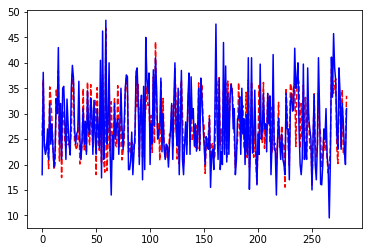

In [9]:
plt.plot(range(len(y_pred)),y_pred,'r--',range(len(y_pred)),y_test.values,'b-')
plt.show()

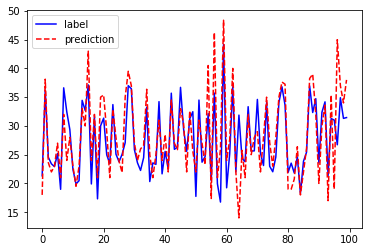

In [21]:
plt.plot(range(len(y_pred[:100])),y_pred[:100],'b-',label='label')
plt.plot(range(len(y_pred[:100])),y_test[:100].values,'r--',label='prediction')
plt.legend(loc='upper left')
plt.show()

In [26]:
rf_regre.fit(X_train_more,y_train_more)
print(rf_regre.feature_importances_)

/Users/rj/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


[ 0.14225275  0.44950051  0.29797179  0.11027495]


In [24]:
y_pred = rf_regre.predict(X_test_more)
print(mean_squared_error(y_pred=y_pred,y_true=y_test))
print(mean_absolute_error(y_pred=y_pred,y_true=y_test))

19.1020452564
3.22172358141


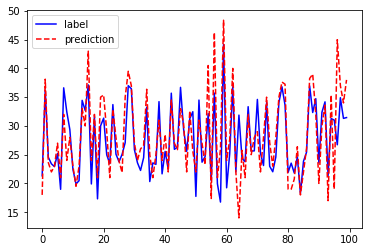

In [25]:
plt.plot(range(len(y_pred[:100])),y_pred[:100],'b-',label='label')
plt.plot(range(len(y_pred[:100])),y_test[:100].values,'r--',label='prediction')
plt.legend(loc='upper left')
plt.show()